# XRD

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
import struct
import scipy
from scipy import signal

In [49]:
d=np.fromfile("28.DAT", dtype=int, count=- 1, sep='', offset=0)
data = pd.DataFrame(d[7:])
data.reset_index(drop = True)

,0
0,70
1,52
2,50
3,58
4,50
...,...
936,43
937,28
938,22
939,22


In [50]:
numbers = data.values

In [51]:
from itertools import chain
Numbers = list(chain.from_iterable(numbers))
print(len(numbers))

941


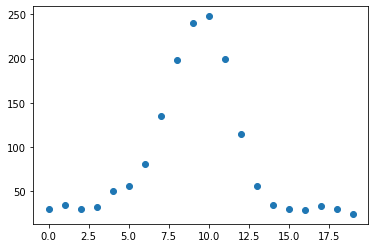

In [209]:
plt.plot(Numbers[415:435], "o")

In [207]:
peaks, properties = scipy.signal.find_peaks(Numbers,prominence = 35 ,height = 0)
peak_coord = peaks.copy()
peaks_heights = properties["peak_heights"]
peaks_prominence = properties["prominences"]
peak_width = scipy.signal.peak_widths(Numbers, peak_coord)
for i in peak_coord:
    i = int(i)
print(f" Координаты всех пиков: {peak_coord}")
print(f" Высоты всех пиков: {peaks_heights}")
print(f" Ширины всех пиков: {list(peak_width[0])}")
print(f" Средняя ширина пика: {np.mean(list(peak_width[0]))}")
print(f" Средняя высота пика: {np.mean(peaks_heights)}")

 Координаты всех пиков: [425 560 626 781 793 862 882 933]
 Высоты всех пиков: [ 248. 1259.  306.   50.   96.  116.   54.   93.]
 Ширины всех пиков: [4.7828877005347294, 4.698950269763145, 4.69890393294645, 6.467532467532465, 3.966666666666697, 6.114604462474631, 4.857142857142776, 4.129166666666606]
 Средняя ширина пика: 4.964481877965937
 Средняя высота пика: 277.75


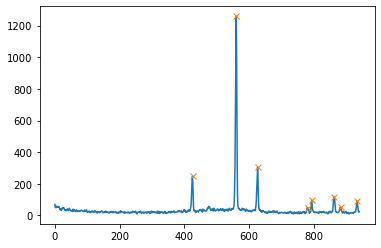

In [208]:
plt.plot(Numbers)
plt.plot(peak_coord, peaks_heights, "x") #нашли 8 пиков

2-й способ - через кривую образец

беру кривую первого пика в окресности 20 точек

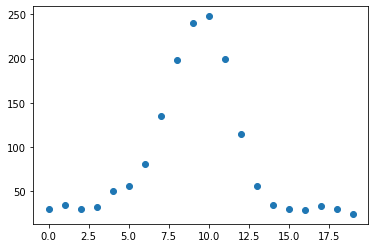

In [164]:
plt.plot(Numbers[415:435], "o")


Теперь нужно ее проитерировать через нашу кривую пиков

In [165]:
covariances = []
x,y = 0,20
while y <= len(Numbers):
    cov = np.cov(Numbers[x:y], Numbers[415:435])
    covariances.append(cov)
    x += 1
    y += 1

In [166]:
covariances

[array([[  74.43157895,  226.01578947],
        [ 226.01578947, 5915.73421053]]),
 array([[  60.62105263,  325.25789474],
        [ 325.25789474, 5915.73421053]]),
 array([[  68.53684211,  339.87894737],
        [ 339.87894737, 5915.73421053]]),
 array([[  71.74736842,  257.37894737],
        [ 257.37894737, 5915.73421053]]),
 array([[  66.35789474,  108.4       ],
        [ 108.4       , 5915.73421053]]),
 array([[  66.13421053,  -70.33421053],
        [ -70.33421053, 5915.73421053]]),
 array([[  65.46315789, -203.53157895],
        [-203.53157895, 5915.73421053]]),
 array([[  57.72631579, -267.23157895],
        [-267.23157895, 5915.73421053]]),
 array([[  56.16842105, -338.95789474],
        [-338.95789474, 5915.73421053]]),
 array([[  53.04210526, -380.15263158],
        [-380.15263158, 5915.73421053]]),
 array([[  47.67105263, -368.17105263],
        [-368.17105263, 5915.73421053]]),
 array([[  49.10263158, -296.33947368],
        [-296.33947368, 5915.73421053]]),
 array([[  47.32

Наиболее нас волнуют ковариции значений XY, значит нужно возвращать элемент побочной диагонали каждой матрицы ковариаций

In [167]:
y_covariances = []
for matrix in covariances:
    y_covariances.append(matrix[0][1])

In [168]:
y_covariances

[226.0157894736842,
 325.25789473684205,
 339.87894736842105,
 257.378947368421,
 108.39999999999999,
 -70.3342105263158,
 -203.5315789473684,
 -267.23157894736846,
 -338.95789473684204,
 -380.15263157894736,
 -368.17105263157896,
 -296.3394736842104,
 -127.69473684210524,
 56.994736842105254,
 200.56842105263158,
 301.4473684210526,
 358.31052631578945,
 347.628947368421,
 307.3315789473685,
 213.29210526315788,
 41.21842105263158,
 -93.57105263157892,
 -178.34999999999997,
 -224.69736842105263,
 -233.61052631578943,
 -228.43421052631578,
 -205.79999999999995,
 -134.46578947368414,
 -32.849999999999994,
 36.97894736842104,
 54.80263157894736,
 38.026315789473685,
 46.61052631578948,
 99.88157894736841,
 176.20789473684212,
 238.2815789473684,
 177.67894736842103,
 81.66842105263157,
 15.960526315789481,
 -63.07631578947368,
 -119.69736842105263,
 -141.47631578947363,
 -158.94999999999993,
 -146.99736842105264,
 -71.28157894736842,
 12.550000000000008,
 69.3315789473684,
 76.9157894736

Мы выделили 8 пиков, поэтому найдем 8 наибольших значений ковариации, а также из индексы в массиве

In [169]:
covar_copy

[-923.9111111111107,
 259.0666666666667,
 85.34444444444449,
 -213.17777777777778,
 167.20000000000002,
 449.3333333333333,
 1213.4777777777776,
 1958.511111111111,
 1022.2666666666665,
 -205.82222222222228,
 -807.4666666666664,
 -1409.3111111111114,
 -1114.7444444444443,
 -857.8888888888888,
 -1183.8444444444444,
 -1265.411111111111,
 -1089.9444444444443,
 -451.15555555555557,
 580.0222222222221,
 1166.3999999999999,
 1168.3,
 1444.1000000000001,
 1419.5888888888887,
 841.2,
 231.02222222222224,
 -468.5888888888891,
 -847.9666666666668,
 -1186.9666666666665,
 -1146.622222222222,
 -834.1666666666665,
 -777.1555555555556,
 -463.62222222222226,
 202.48888888888885,
 908.6333333333333,
 990.9555555555555,
 238.75555555555562,
 -950.7444444444445,
 -978.4444444444443,
 -173.63333333333344,
 726.1888888888889,
 1600.322222222222,
 1473.4,
 583.6444444444444,
 -535.8,
 -1180.0777777777778,
 -825.7888888888887,
 -815.1666666666666,
 -904.8444444444444,
 -152.4222222222222,
 364.7111111111111,

In [188]:
covar_copy = y_covariances.copy()
biggest_values = []
for i in range(1,9):
    value_n_index = []
    biggest_value = max(covar_copy)
    value_index = y_covariances.index(biggest_value)
    value_n_index.append(biggest_value)
    nearby_big_values = list(range(value_index-5, value_index+5))
    print(nearby_big_values)
    value_n_index.append(value_index)
    biggest_values.append(value_n_index)
    for k in nearby_big_values:
        if y_covariances[k] in covar_copy:
            covar_copy.remove(y_covariances[k])

[544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555]
[610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621]
[409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420]
[847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858]
[778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789]
[866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877]
[765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776]
[915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926]


IndexError: list index out of range

In [189]:
biggest_values

[[31140.08157894737, 550],
 [7035.363157894736, 616],
 [5915.734210526314, 415],
 [2792.9052631578943, 853],
 [1747.2026315789471, 784],
 [922.771052631579, 872],
 [882.1342105263157, 771],
 [682.3473684210525, 921]]

In [190]:
biggest_values_coord = sorted([i[1] for i in biggest_values])
biggest_values_coord = [i+10 for i in biggest_values_coord]
biggest_values_coord

[425, 560, 626, 781, 794, 863, 882, 931]

In [191]:
peak_coord

array([], dtype=int64)

In [192]:
peak_heights_gauss = [Numbers[i] for i in biggest_values_coord]
peak_heights_gauss

[248, 1259, 306, 50, 78, 116, 54, 54]

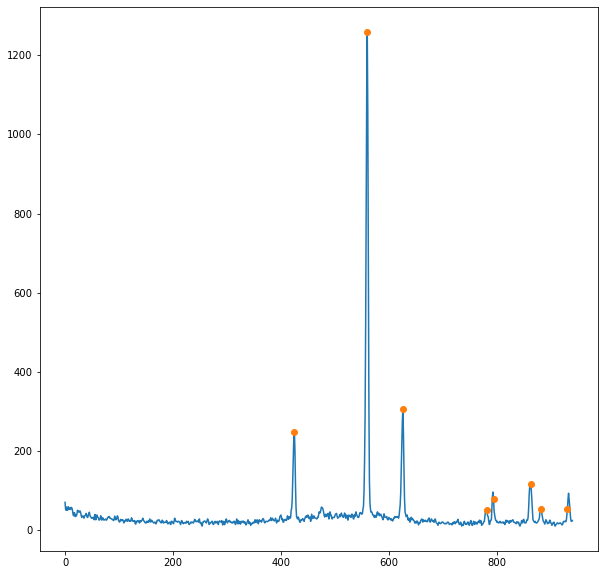

In [200]:
plt.figure(figsize=(10,10))
plt.plot(Numbers)
plt.plot(biggest_values_coord, peak_heights_gauss,"o")